In [33]:
import numpy
import pandas as pd

In [266]:
df = pd.read_csv('./data/649.csv', parse_dates=['DrawDate'])

In [267]:
df['Sum'] = df.sum(axis=1)
df['SumNoBonus'] = df['Sum'] - df['Bonus']

/tmp/ipykernel_3215/3485747256.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Sum'] = df.sum(axis=1)


In [268]:
df.head()

,DrawDate,Draw1,Draw2,Draw3,Draw4,Draw5,Draw6,Bonus,Sum,SumNoBonus
0,2022-12-17,11,18,20,23,29,42,6,149,143
1,2022-12-14,9,21,34,37,41,44,24,210,186
2,2022-12-10,10,14,20,35,37,40,48,204,156
3,2022-12-07,22,23,38,41,44,48,8,224,216
4,2022-12-03,4,18,26,36,41,42,32,199,167


<AxesSubplot: ylabel='Frequency'>

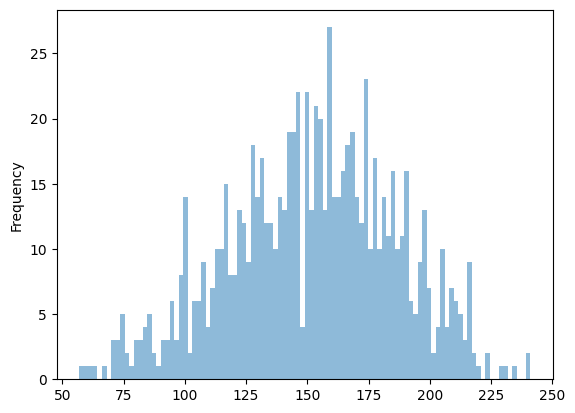

In [269]:
df['SumNoBonus'].plot.hist(bins=100, alpha=0.5)

### Stats for Sum
 * Mean 176
 * STD 36

Best between 140 ~ 212

Top 10 Sum **[167, 202, 142, 179, 186, 190, 191, 220, 146, 123]** hit almost 15% of total count 

Bonus Top picks **[5, 21, 3, 9 ,2, 48, 10, 49, 23, 47, 31, 27]** [0 ~1 0] [20 ~ 30] has more chance

### Fall in (0,10] (11,20] (21, 30], (31, 40], (41,50]
| Combine10-50 | Counts |
| ----------- | ----------- |
| 11121 | 31 |
| 11211 | 29 |
| 21111 | 27 |
| 01122 | 16 |
| 11202 | 16 |
| 02121 | 15 |
| 12111 | 15 |

### Odd and Even

More Odd than Even

| Odd Even Combine | Counts |
| ----------- | ----------- |
| 3 + 3 | 269 |
| 4 + 2 | 215 |
| 2 + 4 | 191 |

### Divide 3 and count remain

| Combine 0 1 2 | Counts |
| ----------- | ----------- |
| 222 | 117 |
| 312 | 80 |
| 132 | 80 |
| 123 | 77 |
| 321 | 77 |
| 213 | 73 |
| 231 | 71 |

### Divide 5 and Count remain

| Combine 0 1 2 3 4| Counts |
| ----------- | ----------- |
| 11121 | 31 |
| 11112 | 25 |
| 12111 | 24 |
| 21111 | 20 |
| 11022 | 18 |
| 12021 | 18 |

### No point to go over 5

In [187]:
bins = [10,20,30,40,50]
for b in bins:
    df[str(b)] = 0
df['odd'] = 0
df['even'] = 0

In [188]:
for index, row in df.iterrows():
    for i in range(1,7):
        if row['Draw'+str(i)]%2 == 1:
            df.at[index, 'odd'] += 1
        else:
            df.at[index, 'even'] += 1
        for b in bins:
            if row['Draw'+str(i)] <= b and row['Draw'+str(i)] > b - 10:
                df.at[index, str(b)] += 1

In [195]:
# df.to_csv('./data/649.new.csv', index=False)

In [193]:
df['combineOE'] = df['odd'] * 10 + df['even']

In [194]:
df

,DrawDate,Draw1,Draw2,Draw3,Draw4,Draw5,Draw6,Bonus,Sum,SumNoBonus,10,20,30,40,50,odd,even,combineOE
0,2022-12-17,11,18,20,23,29,42,6,149,143,0,3,2,0,1,3,3,33
1,2022-12-14,9,21,34,37,41,44,24,210,186,1,0,1,2,2,4,2,42
2,2022-12-10,10,14,20,35,37,40,48,204,156,1,2,0,3,0,2,4,24
3,2022-12-07,22,23,38,41,44,48,8,224,216,0,0,2,1,3,2,4,24
4,2022-12-03,4,18,26,36,41,42,32,199,167,1,1,1,1,2,1,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2015-01-21,3,15,17,35,44,46,23,183,160,1,2,0,1,2,4,2,42
823,2015-01-17,9,15,21,27,35,40,5,152,147,1,1,2,2,0,5,1,51
824,2015-01-14,15,16,17,28,33,44,36,189,153,0,3,1,1,1,3,3,33
825,2015-01-10,1,11,23,25,27,30,43,160,117,1,1,4,0,0,5,1,51


In [181]:
for b in bins:
 display(df.groupby([str(b)])[str(b)].count().reset_index(name='count').sort_values(['count'], ascending=False))

,10,count
1,1,323
0,0,210
2,2,204
3,3,78
4,4,12


,20,count
1,1,350
0,0,208
2,2,196
3,3,66
4,4,7


,30,count
1,1,338
2,2,232
0,0,189
3,3,63
4,4,5


,40,count
1,1,322
2,2,232
0,0,197
3,3,67
4,4,9


,50,count
1,1,352
2,2,217
0,0,206
3,3,47
4,4,5


In [196]:
df.groupby(['combineOE'])['combineOE'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,combineOE,count
3,33,269
4,42,215
2,24,191
5,51,71
1,15,70


In [97]:
df2 = df.groupby(['Draw1', pd.cut(df['Draw1'], [1,10,20,30,40,50])]).size().unstack()

In [98]:
df2.append(df2.sum(numeric_only=True), ignore_index=True)

/tmp/ipykernel_3215/125599430.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append(df2.sum(numeric_only=True), ignore_index=True)


Draw1,"(1, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]"
0,0,0,0,0,0
1,79,0,0,0,0
2,81,0,0,0,0
3,74,0,0,0,0
4,55,0,0,0,0
5,70,0,0,0,0
6,48,0,0,0,0
7,41,0,0,0,0
8,49,0,0,0,0
9,39,0,0,0,0


Draw1 [1 ~ 10] Chance is 65% [10 ~ 20] is 20%

# Divide test

In [274]:
for i in range(1,7):
    df['Draw'+str(i)] = df['Draw'+str(i)] % 2

In [275]:
bins = [0,1]
for b in bins:
    df[str(b)] = 0

In [276]:
for index, row in df.iterrows():
    for i in range(1,7):
        for b in bins:
            if row['Draw'+str(i)] == b:
                df.at[index, str(b)] += 1

In [277]:
df.head()

,DrawDate,Draw1,Draw2,Draw3,Draw4,Draw5,Draw6,Bonus,Sum,SumNoBonus,0,1
0,2022-12-17,1,0,0,1,1,0,6,149,143,3,3
1,2022-12-14,1,1,0,1,1,0,24,210,186,2,4
2,2022-12-10,0,0,0,1,1,0,48,204,156,4,2
3,2022-12-07,0,1,0,1,0,0,8,224,216,4,2
4,2022-12-03,0,0,0,0,1,0,32,199,167,5,1


In [279]:
df['combineDraws'] = df['Draw1']* 100000 + df['Draw2'] * 10000 + df['Draw3']* 1000 + df['Draw4']* 100 + df['Draw5'] * 10 + df['Draw6']

In [280]:
df.head()

,DrawDate,Draw1,Draw2,Draw3,Draw4,Draw5,Draw6,Bonus,Sum,SumNoBonus,0,1,combineDraws
0,2022-12-17,1,0,0,1,1,0,6,149,143,3,3,100110
1,2022-12-14,1,1,0,1,1,0,24,210,186,2,4,110110
2,2022-12-10,0,0,0,1,1,0,48,204,156,4,2,110
3,2022-12-07,0,1,0,1,0,0,8,224,216,4,2,10100
4,2022-12-03,0,0,0,0,1,0,32,199,167,5,1,10


In [263]:
# df.to_csv('./data/649.general.new.csv', index=False)

In [281]:
df2 = df.groupby(['combineDraws'])['combineDraws'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [282]:
df2.to_csv('./data/647.div2.csv', index=False)

In [252]:
df = pd.read_csv('./data/649.general.csv', parse_dates=['DrawDate'])

In [254]:
df['Combine10-50'] = df['10'] * 10000 + df['20']* 1000 + df['30']* 100 + df['40']*10 + df['50']

In [255]:
df.head()

,DrawDate,Draw1,Draw2,Draw3,Draw4,Draw5,Draw6,Bonus,Sum,SumNoBonus,10,20,30,40,50,odd,even,combineOE,Combine10-50
0,2022-12-17,11,18,20,23,29,42,6,149,143,0,3,2,0,1,3,3,33,3201
1,2022-12-14,9,21,34,37,41,44,24,210,186,1,0,1,2,2,4,2,42,10122
2,2022-12-10,10,14,20,35,37,40,48,204,156,1,2,0,3,0,2,4,24,12030
3,2022-12-07,22,23,38,41,44,48,8,224,216,0,0,2,1,3,2,4,24,213
4,2022-12-03,4,18,26,36,41,42,32,199,167,1,1,1,1,2,1,5,15,11112


In [265]:
7+16+25+34+38+48

168

In [283]:
49 * 48 * 47 * 46 *45 / (5 * 4 *3 *2 *1)

1906884.0

In [284]:
49 * 48 * 47 * 46 *45 * 44/ (6*5 * 4 *3 *2 *1)

13983816.0

In [287]:
50 * 49 * 48 * 47 * 46 *45 * 44 / (7 *6*5 * 4 *3 *2 *1) / 3

33294800.0